In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [27]:
# Step 1: Load the Dataset
df = pd.read_excel('Absenteeism_at_work_Project.xls')

In [28]:
# Step 2: Explore the Dataset
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Dataset Overview:
   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average per day   ...  Disciplinary failure

In [29]:
# Step 3: Data Preprocessing
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                                  0
Reason for absence                  0
Month of absence                    0
Day of the week                     0
Seasons                             0
Transportation expense              0
Distance from Residence to Work     0
Service time                        0
Age                                 0
Work load Average per day           6
Hit target                          0
Disciplinary failure                0
Education                           0
Son                                 0
Social drinker                      0
Social smoker                       0
Pet                                 0
Weight                              0
Height                              9
Body mass index                    25
Absenteeism time in hours           0
dtype: int64


In [30]:
# Replace missing values with the median and ensure they are integers
df.fillna(df.median(), inplace=True)
df = df.round()  # Ensure all values are rounded to the nearest integer


In [31]:
# Convert categorical variables into numerical if needed
df['Reason for absence'] = df['Reason for absence'].astype('category').cat.codes
df['Seasons'] = df['Seasons'].astype('category').cat.codes
df['Day of the week'] = df['Day of the week'].astype('category').cat.codes

In [32]:
# Step 4: Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
                      'Work load Average per day ', 'Weight', 'Height', 'Body mass index']  # Changed column name here
df[numerical_features] = scaler.fit_transform(df[numerical_features])

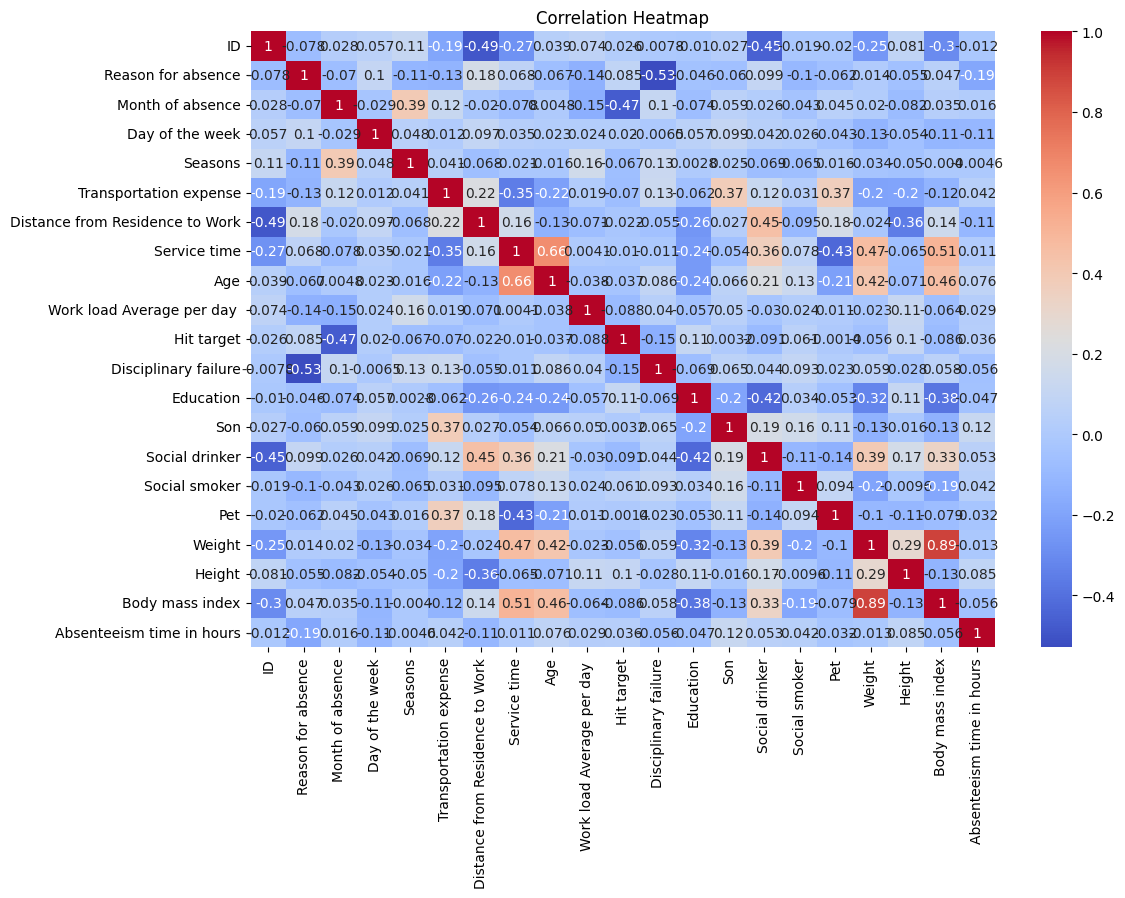

In [33]:
# Step 5: Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

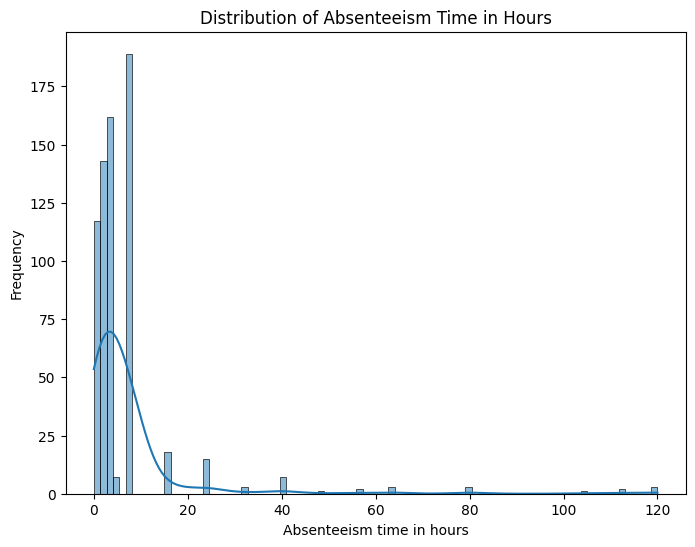

In [34]:
# Distribution of Absenteeism Time
plt.figure(figsize=(8, 6))
sns.histplot(df['Absenteeism time in hours'], kde=True)
plt.title('Distribution of Absenteeism Time in Hours')
plt.xlabel('Absenteeism time in hours')
plt.ylabel('Frequency')
plt.show()

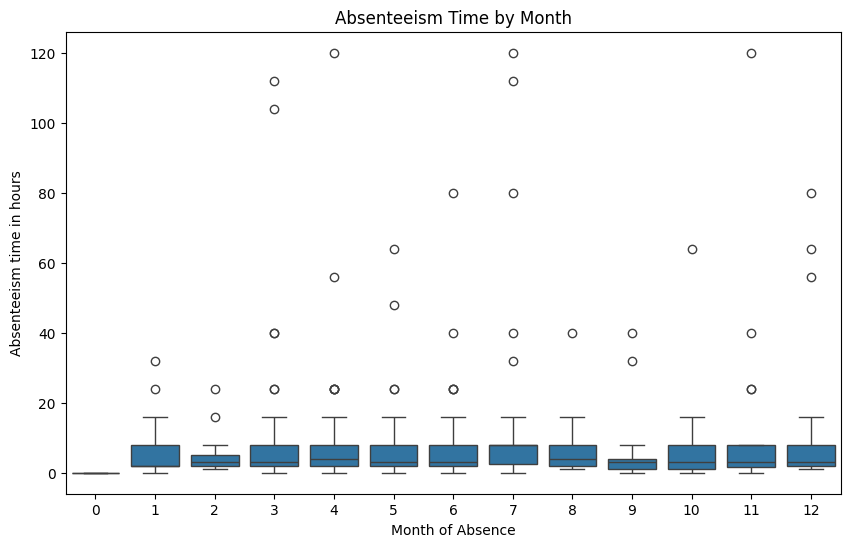

In [35]:
# Absenteeism by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month of absence', y='Absenteeism time in hours', data=df)
plt.title('Absenteeism Time by Month')
plt.xlabel('Month of Absence')
plt.ylabel('Absenteeism time in hours')
plt.show()

In [37]:
# Step 6: Insights and Actionable Recommendations
# Analyze impact of reasons for absence, seasons, workload, and other factors on absenteeism

# Absenteeism by Reason for Absence
reason_absence_mean = df.groupby('Reason for absence')['Absenteeism time in hours'].mean()
print("\nAverage Absenteeism Time by Reason for Absence:")
print(reason_absence_mean)


Average Absenteeism Time by Reason for Absence:
Reason for absence
0      3.333333
1     11.375000
2     24.000000
3      8.000000
4      4.500000
5      6.333333
6     23.285714
7     10.000000
8      4.800000
9     50.666667
10    10.363636
11     7.080000
12    23.375000
13    15.132075
14     7.470588
15     8.000000
16     2.000000
17     8.000000
18    10.578947
19    19.111111
20     5.400000
21     7.645161
22     2.918519
23     8.000000
24     3.533333
25     7.225806
26     2.333333
27     3.009434
Name: Absenteeism time in hours, dtype: float64


In [36]:
# Absenteeism by Social Drinker/Smoker
social_drinker_absenteeism = df.groupby('Social drinker')['Absenteeism time in hours'].mean()
social_smoker_absenteeism = df.groupby('Social smoker')['Absenteeism time in hours'].mean()

print("\nAverage Absenteeism Time for Social Drinker:")
print(social_drinker_absenteeism)
print("\nAverage Absenteeism Time for Social Smoker:")
print(social_smoker_absenteeism)


Average Absenteeism Time for Social Drinker:
Social drinker
0    6.206897
1    7.673575
Name: Absenteeism time in hours, dtype: float64

Average Absenteeism Time for Social Smoker:
Social smoker
0    6.880192
1    9.100000
Name: Absenteeism time in hours, dtype: float64


In [25]:
# Actionable Insights (Manual)
print("\nActionable Insights:")
print("1. Implement wellness programs focusing on common reasons for absence.")
print("2. Provide flexible work arrangements during high absenteeism seasons.")
print("3. Address transportation and distance challenges to reduce absenteeism.")
print("4. Develop targeted interventions for high absenteeism demographics (e.g., social drinkers/smokers")


Actionable Insights:
1. Implement wellness programs focusing on common reasons for absence.
2. Provide flexible work arrangements during high absenteeism seasons.
3. Address transportation and distance challenges to reduce absenteeism.
4. Develop targeted interventions for high absenteeism demographics (e.g., social drinkers/smokers


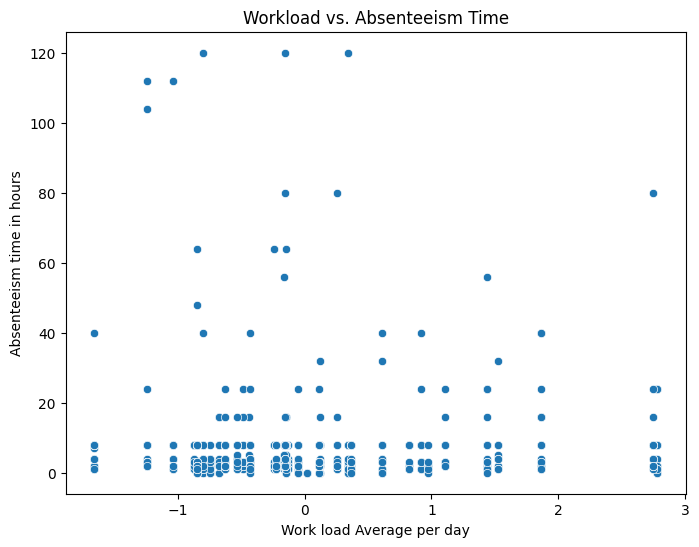

In [39]:
# Analyze the relationship between workload and absenteeism
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Work load Average per day ', y='Absenteeism time in hours', data=df)
plt.title('Workload vs. Absenteeism Time')
plt.xlabel('Work load Average per day')
plt.ylabel('Absenteeism time in hours')
plt.show()


Average Absenteeism Time by Season:
Seasons
0    7.250000
1    6.283237
2    8.247191
3    6.366864
Name: Absenteeism time in hours, dtype: float64


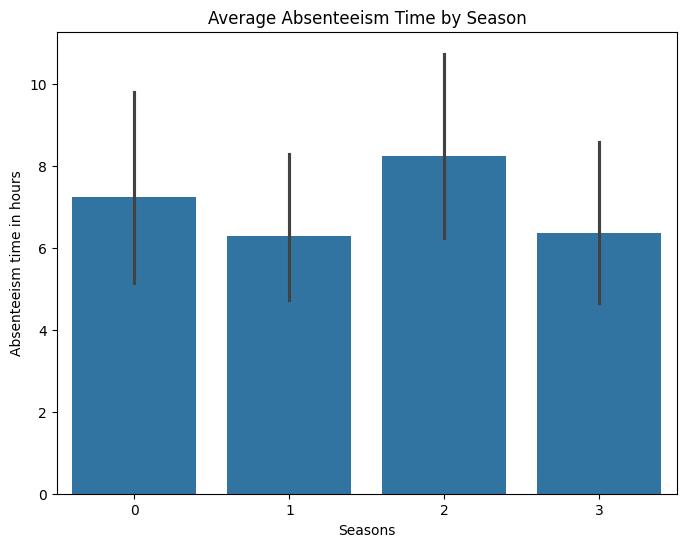

In [40]:
# Analyze absenteeism trends across different seasons
season_absence_mean = df.groupby('Seasons')['Absenteeism time in hours'].mean()
print("\nAverage Absenteeism Time by Season:")
print(season_absence_mean)

# Visualize absenteeism by season
plt.figure(figsize=(8, 6))
sns.barplot(x='Seasons', y='Absenteeism time in hours', data=df)
plt.title('Average Absenteeism Time by Season')
plt.xlabel('Seasons')
plt.ylabel('Absenteeism time in hours')
plt.show()

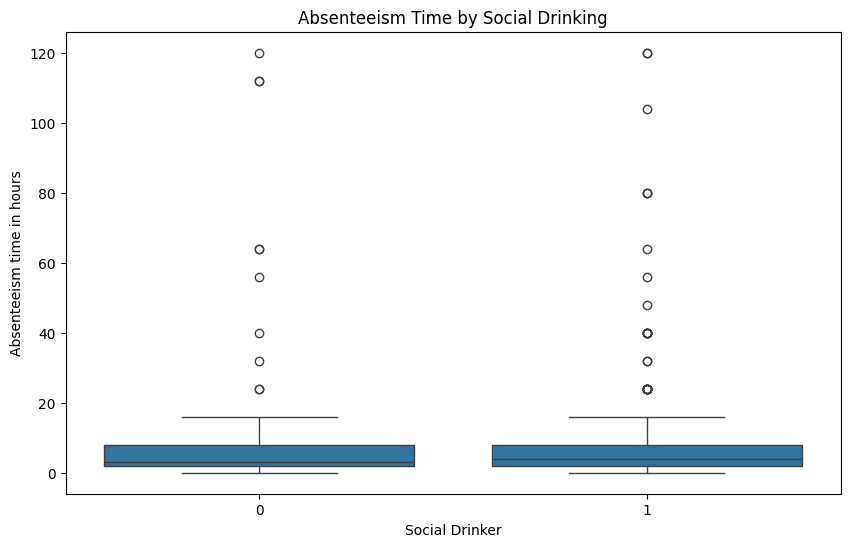

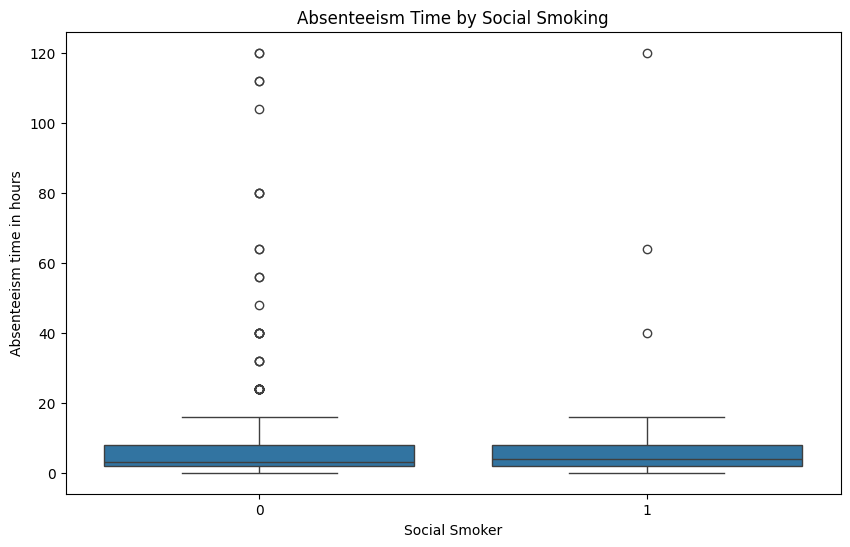

In [41]:
# Visualize absenteeism based on social behavior
plt.figure(figsize=(10, 6))
sns.boxplot(x='Social drinker', y='Absenteeism time in hours', data=df)
plt.title('Absenteeism Time by Social Drinking')
plt.xlabel('Social Drinker')
plt.ylabel('Absenteeism time in hours')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Social smoker', y='Absenteeism time in hours', data=df)
plt.title('Absenteeism Time by Social Smoking')
plt.xlabel('Social Smoker')
plt.ylabel('Absenteeism time in hours')
plt.show()

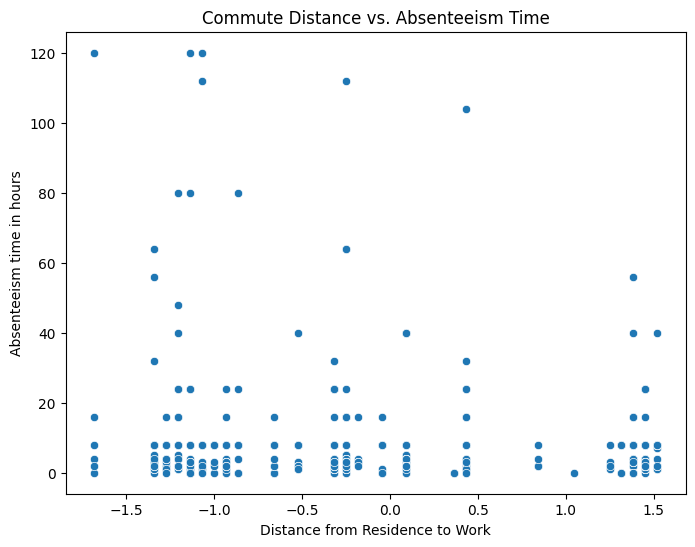

In [42]:
# Analyze the relationship between commute distance and absenteeism
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance from Residence to Work', y='Absenteeism time in hours', data=df)
plt.title('Commute Distance vs. Absenteeism Time')
plt.xlabel('Distance from Residence to Work')
plt.ylabel('Absenteeism time in hours')
plt.show()


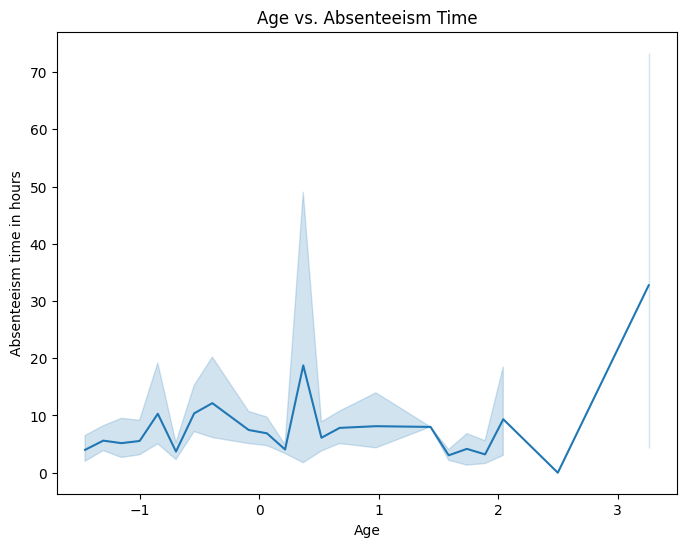

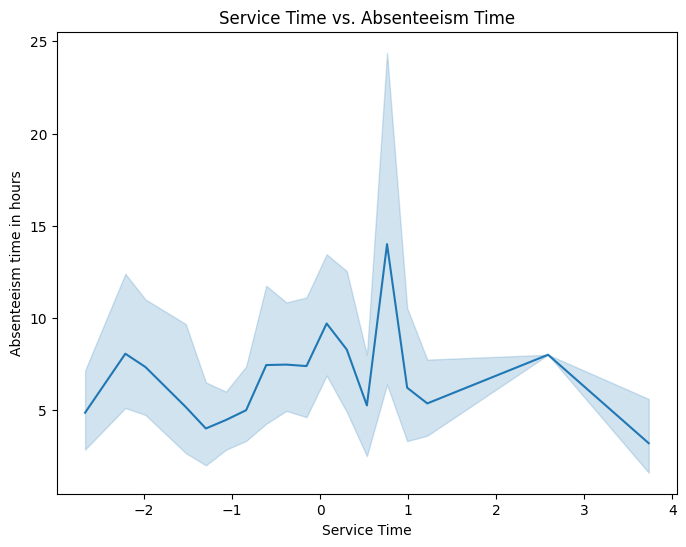

In [43]:
# Analyze absenteeism by age
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='Absenteeism time in hours', data=df)
plt.title('Age vs. Absenteeism Time')
plt.xlabel('Age')
plt.ylabel('Absenteeism time in hours')
plt.show()

# Analyze absenteeism by service time
plt.figure(figsize=(8, 6))
sns.lineplot(x='Service time', y='Absenteeism time in hours', data=df)
plt.title('Service Time vs. Absenteeism Time')
plt.xlabel('Service Time')
plt.ylabel('Absenteeism time in hours')
plt.show()

Dataset Overview:
   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average per day   ...  Disciplinary failure

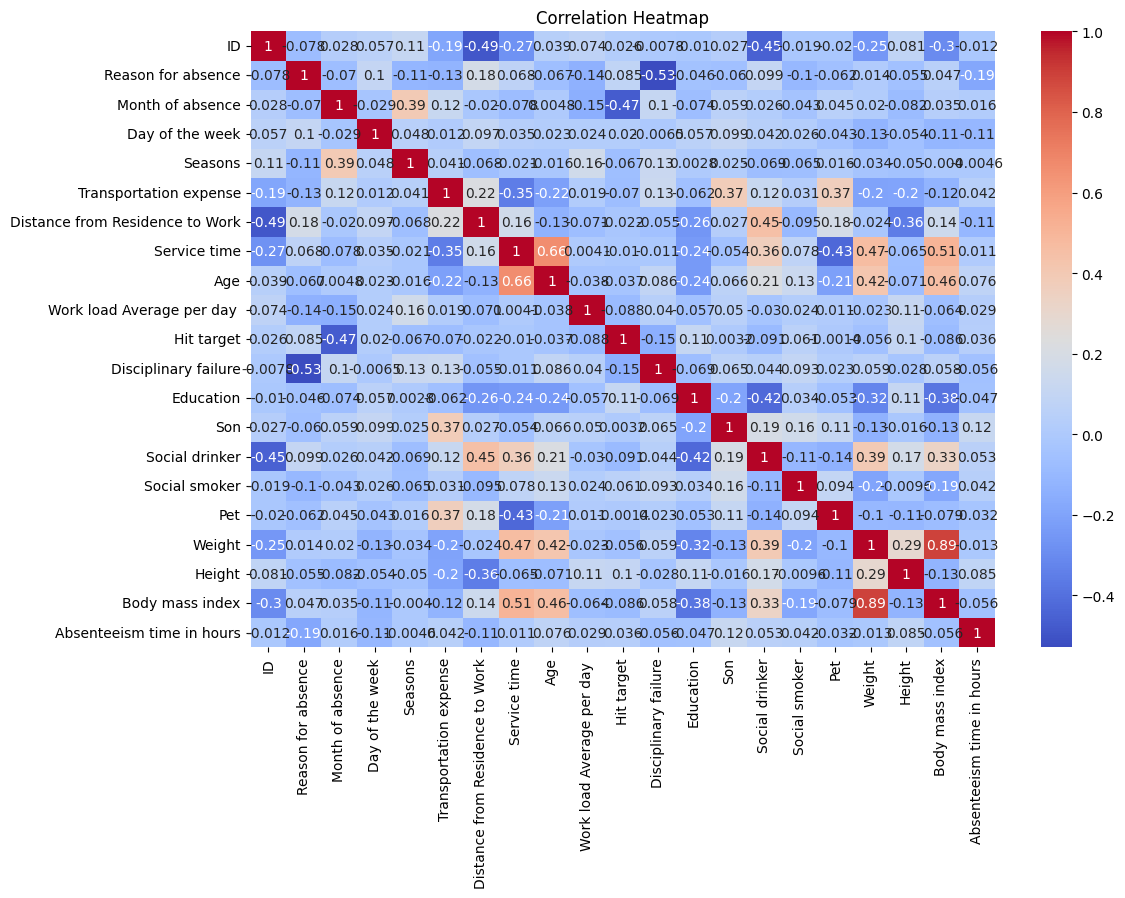

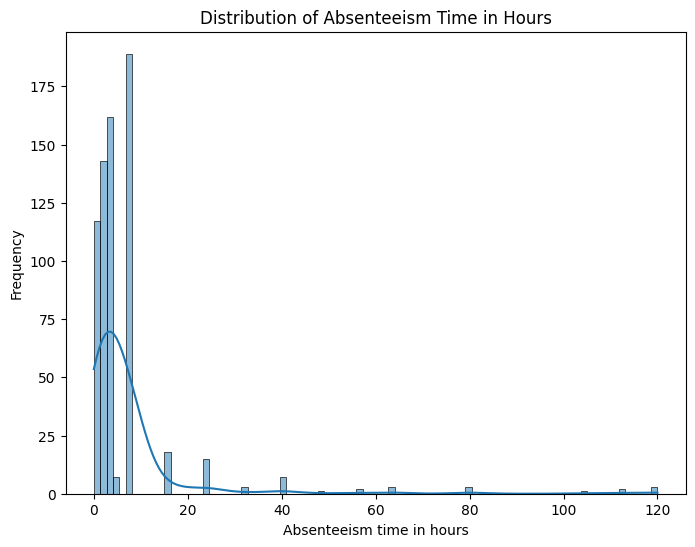

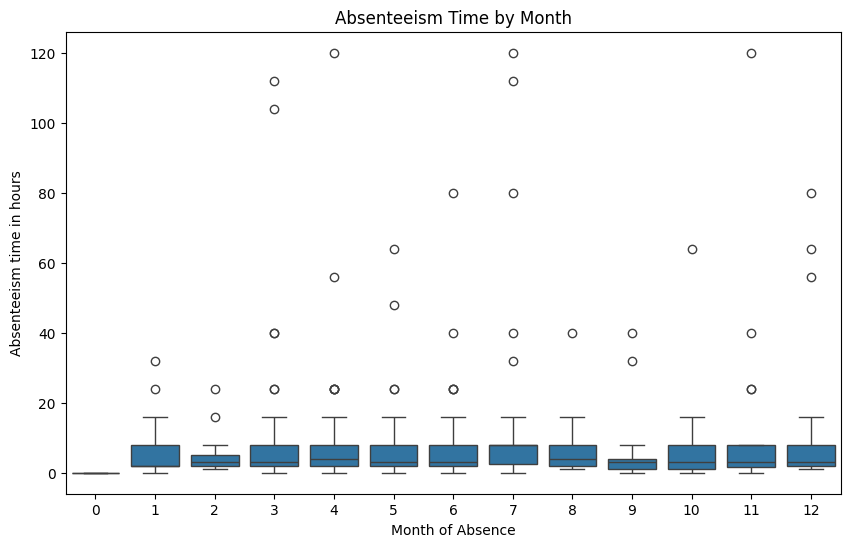


Average Absenteeism Time by Reason for Absence:
Reason for absence
0      3.333333
1     11.375000
2     24.000000
3      8.000000
4      4.500000
5      6.333333
6     23.285714
7     10.000000
8      4.800000
9     50.666667
10    10.363636
11     7.080000
12    23.375000
13    15.132075
14     7.470588
15     8.000000
16     2.000000
17     8.000000
18    10.578947
19    19.111111
20     5.400000
21     7.645161
22     2.918519
23     8.000000
24     3.533333
25     7.225806
26     2.333333
27     3.009434
Name: Absenteeism time in hours, dtype: float64

Average Absenteeism Time for Social Drinker:
Social drinker
0    6.206897
1    7.673575
Name: Absenteeism time in hours, dtype: float64

Average Absenteeism Time for Social Smoker:
Social smoker
0    6.880192
1    9.100000
Name: Absenteeism time in hours, dtype: float64

Actionable Insights:
1. Implement wellness programs focusing on common reasons for absence.
2. Provide flexible work arrangements during high absenteeism seasons.


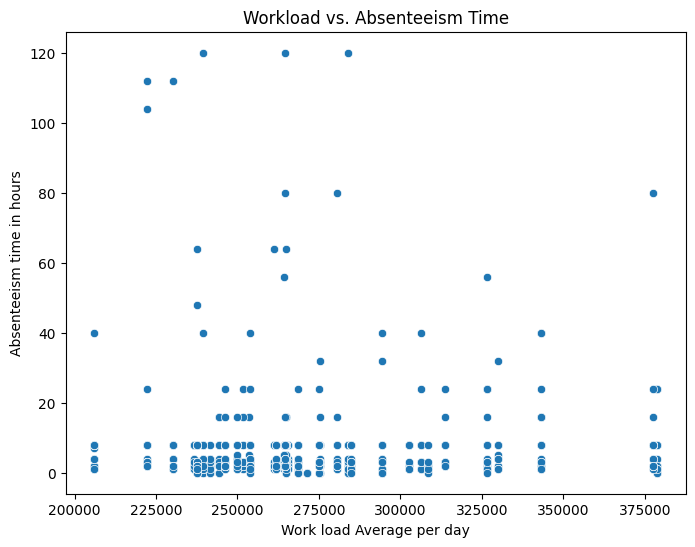


Average Absenteeism Time by Season:
Seasons
0    7.250000
1    6.283237
2    8.247191
3    6.366864
Name: Absenteeism time in hours, dtype: float64


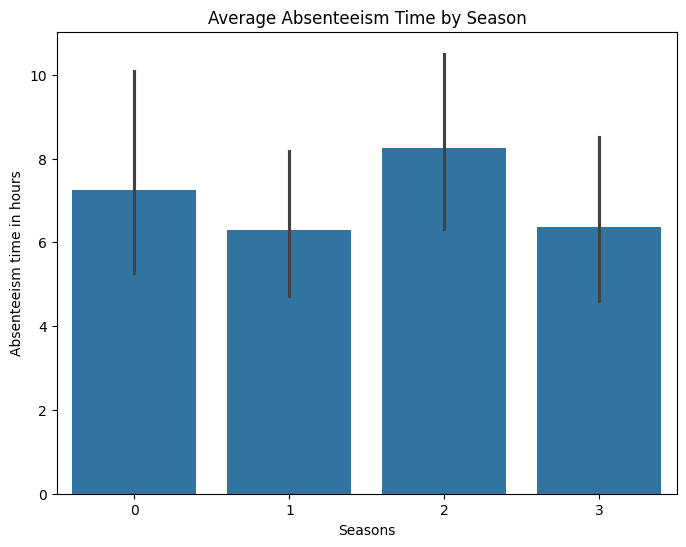

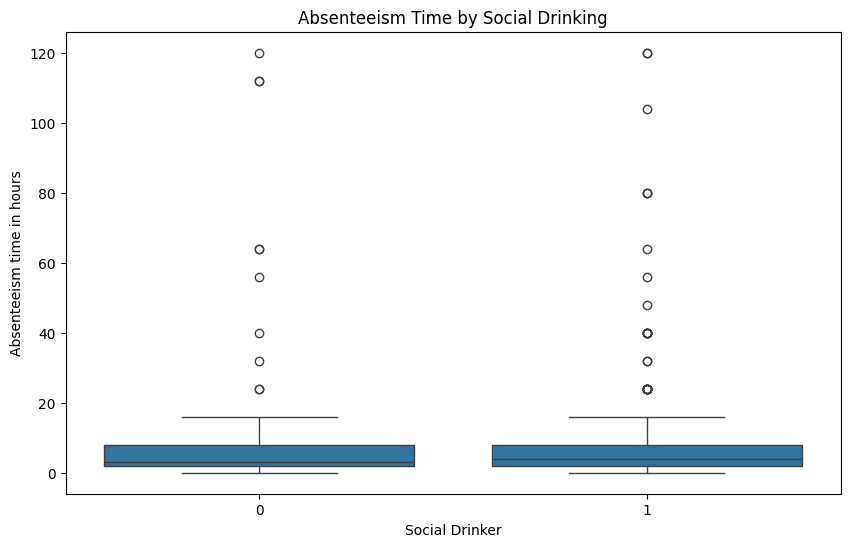

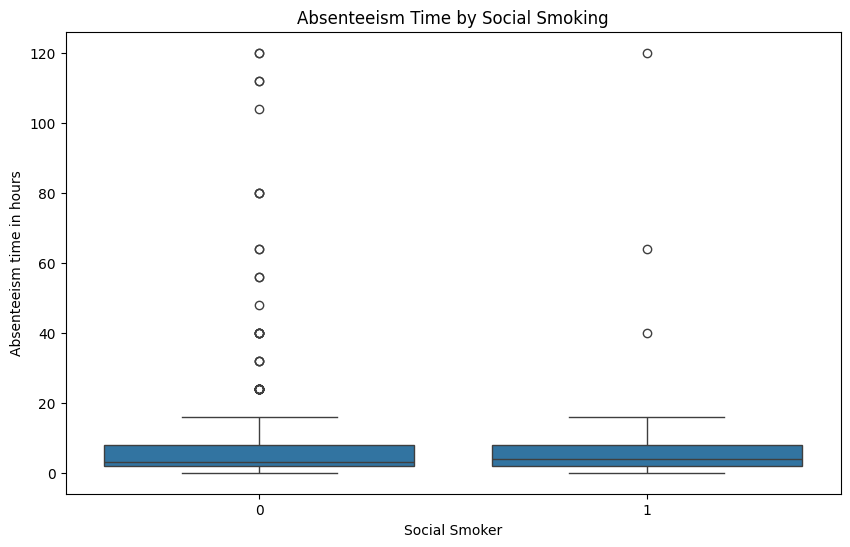

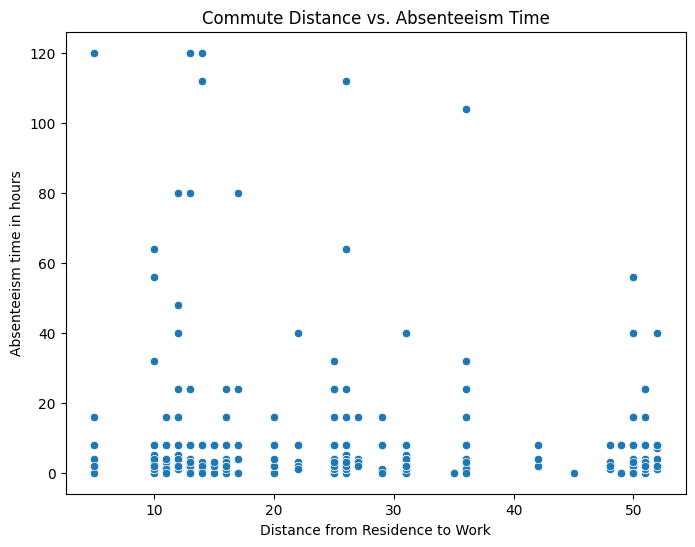

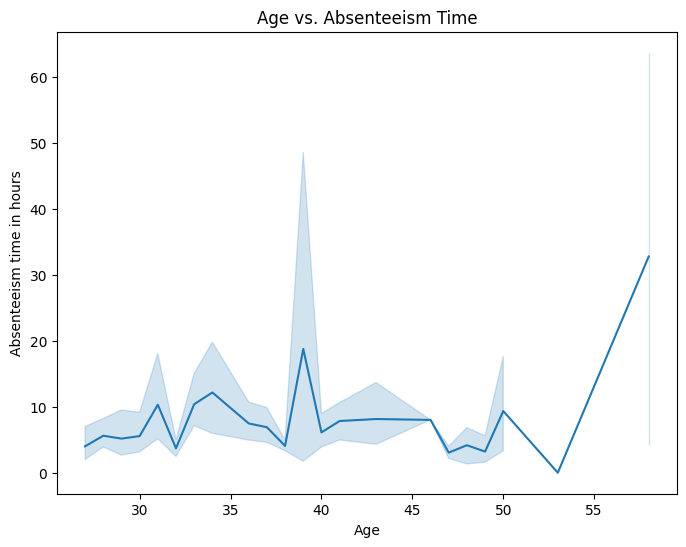

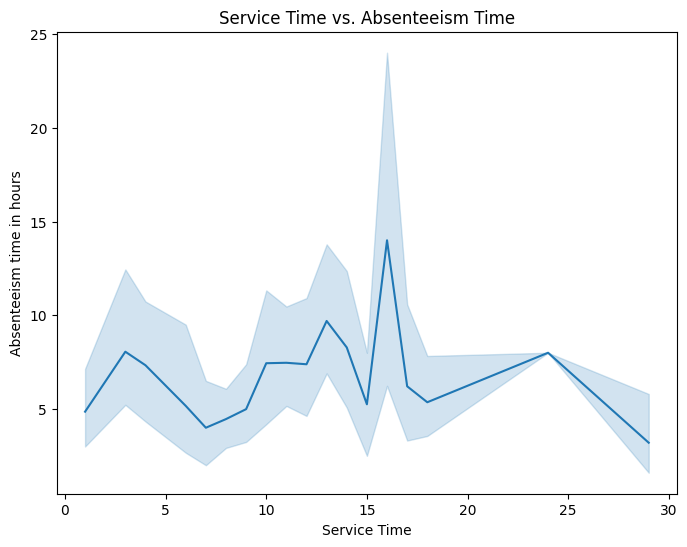

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Load the Dataset
df = pd.read_excel('Absenteeism_at_work_Project.xls')

# Step 2: Explore the Dataset
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Step 3: Data Preprocessing
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Replace missing values or drop them if necessary
df.fillna(df.median(), inplace=True)

# Convert categorical variables into numerical if needed
df['Reason for absence'] = df['Reason for absence'].astype('category').cat.codes
df['Seasons'] = df['Seasons'].astype('category').cat.codes
df['Day of the week'] = df['Day of the week'].astype('category').cat.codes

# Step 5: Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Absenteeism Time
plt.figure(figsize=(8, 6))
sns.histplot(df['Absenteeism time in hours'], kde=True)
plt.title('Distribution of Absenteeism Time in Hours')
plt.xlabel('Absenteeism time in hours')
plt.ylabel('Frequency')
plt.show()

# Absenteeism by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month of absence', y='Absenteeism time in hours', data=df)
plt.title('Absenteeism Time by Month')
plt.xlabel('Month of Absence')
plt.ylabel('Absenteeism time in hours')
plt.show()

# Step 6: Insights and Actionable Recommendations
# Analyze impact of reasons for absence, seasons, workload, and other factors on absenteeism

# Absenteeism by Reason for Absence
reason_absence_mean = df.groupby('Reason for absence')['Absenteeism time in hours'].mean()
print("\nAverage Absenteeism Time by Reason for Absence:")
print(reason_absence_mean)

# Absenteeism by Social Drinker/Smoker
social_drinker_absenteeism = df.groupby('Social drinker')['Absenteeism time in hours'].mean()
social_smoker_absenteeism = df.groupby('Social smoker')['Absenteeism time in hours'].mean()

print("\nAverage Absenteeism Time for Social Drinker:")
print(social_drinker_absenteeism)
print("\nAverage Absenteeism Time for Social Smoker:")
print(social_smoker_absenteeism)

# Actionable Insights (Manual)
print("\nActionable Insights:")
print("1. Implement wellness programs focusing on common reasons for absence.")
print("2. Provide flexible work arrangements during high absenteeism seasons.")
print("3. Address transportation and distance challenges to reduce absenteeism.")
print("4. Develop targeted interventions for high absenteeism demographics (e.g., social drinkers/smokers).")
# EDA: Workload vs Absenteeism
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Work load Average per day ', y='Absenteeism time in hours', data=df)
plt.title('Workload vs. Absenteeism Time')
plt.xlabel('Work load Average per day')
plt.ylabel('Absenteeism time in hours')
plt.show()

# EDA: Absenteeism by Season
season_absence_mean = df.groupby('Seasons')['Absenteeism time in hours'].mean()
print("\nAverage Absenteeism Time by Season:")
print(season_absence_mean)

plt.figure(figsize=(8, 6))
sns.barplot(x='Seasons', y='Absenteeism time in hours', data=df)
plt.title('Average Absenteeism Time by Season')
plt.xlabel('Seasons')
plt.ylabel('Absenteeism time in hours')
plt.show()

# EDA: Absenteeism Time by Social Drinking
plt.figure(figsize=(10, 6))
sns.boxplot(x='Social drinker', y='Absenteeism time in hours', data=df)
plt.title('Absenteeism Time by Social Drinking')
plt.xlabel('Social Drinker')
plt.ylabel('Absenteeism time in hours')
plt.show()

# EDA: Absenteeism Time by Social Smoking
plt.figure(figsize=(10, 6))
sns.boxplot(x='Social smoker', y='Absenteeism time in hours', data=df)
plt.title('Absenteeism Time by Social Smoking')
plt.xlabel('Social Smoker')
plt.ylabel('Absenteeism time in hours')
plt.show()

# EDA: Commute Distance vs Absenteeism
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Distance from Residence to Work', y='Absenteeism time in hours', data=df)
plt.title('Commute Distance vs. Absenteeism Time')
plt.xlabel('Distance from Residence to Work')
plt.ylabel('Absenteeism time in hours')
plt.show()

# EDA: Age vs Absenteeism
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='Absenteeism time in hours', data=df)
plt.title('Age vs. Absenteeism Time')
plt.xlabel('Age')
plt.ylabel('Absenteeism time in hours')
plt.show()

# EDA: Service Time vs Absenteeism
plt.figure(figsize=(8, 6))
sns.lineplot(x='Service time', y='Absenteeism time in hours', data=df)
plt.title('Service Time vs. Absenteeism Time')
plt.xlabel('Service Time')
plt.ylabel('Absenteeism time in hours')
plt.show()


Dataset Overview:
   ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average per day   ...  Disciplinary failure

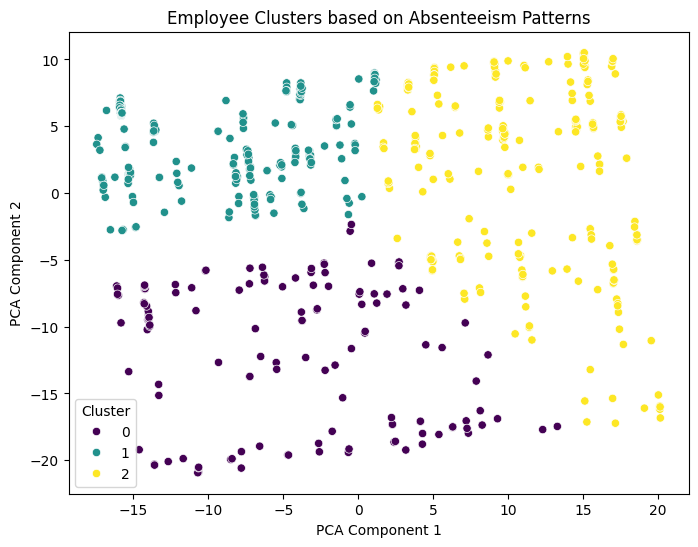

Feature Importances:
                                 importance
Reason for absence                 0.223858
Work load Average per day          0.100890
Month of absence                   0.089522
Hit target                         0.087220
Day of the week                    0.074214
Transportation expense             0.057232
Seasons                            0.050648
ID                                 0.046049
Body mass index                    0.034595
Height                             0.034494
Service time                       0.030584
Distance from Residence to Work    0.030235
Son                                0.029537
Age                                0.029487
Disciplinary failure               0.027873
Weight                             0.026288
Pet                                0.010443
Education                          0.007281
Social drinker                     0.006668
Social smoker                      0.002883


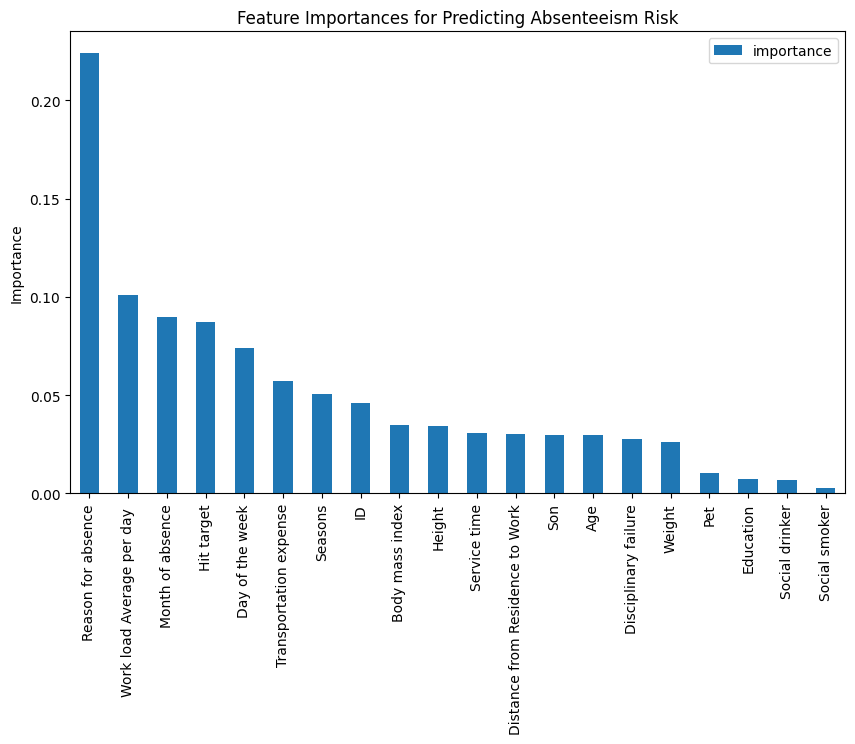

Number of Anomalies Detected: 34


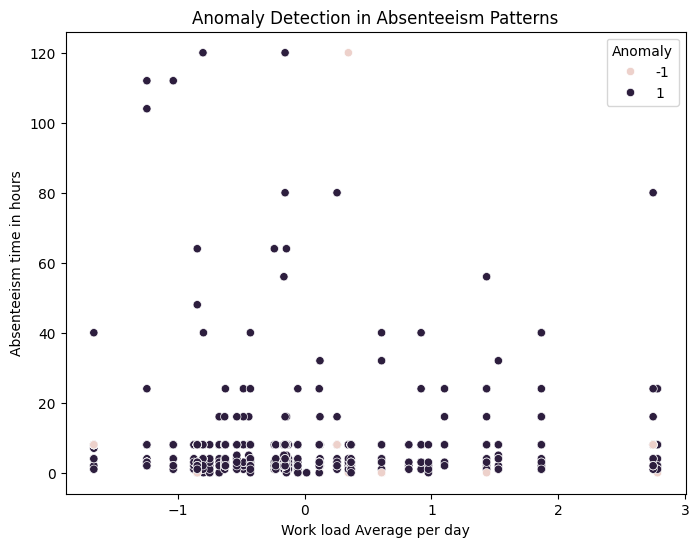

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_excel('Absenteeism_at_work_Project.xls')

# Explore the dataset
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Replace missing values with the median and ensure they are integers
df.fillna(df.median(), inplace=True)
df = df.round()

# Encode categorical variables
categorical_features = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

# Standardize numerical features
numerical_features = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
                      'Work load Average per day ', 'Weight', 'Height', 'Body mass index']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# Machine Learning: Predicting Absenteeism Time Using Regression Models
X = df.drop(['Absenteeism time in hours'], axis=1)
y = df['Absenteeism time in hours']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')

# Machine Learning: Classifying High-Risk Employees
threshold = df['Absenteeism time in hours'].median()
df['High_Risk'] = (df['Absenteeism time in hours'] > threshold).astype(int)

X = df.drop(['Absenteeism time in hours', 'High_Risk'], axis=1)
y = df['High_Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Machine Learning: Clustering Employees Using K-Means
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Employee Clusters based on Absenteeism Patterns')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Machine Learning: Feature Importance Analysis
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf_model.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances for Predicting Absenteeism Risk')
plt.ylabel('Importance')
plt.show()

# Machine Learning: Anomaly Detection Using Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = isolation_forest.fit_predict(X)

anomalies = df[df['Anomaly'] == -1]
print(f'Number of Anomalies Detected: {anomalies.shape[0]}')

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Work load Average per day ', y='Absenteeism time in hours', hue='Anomaly', data=df)
plt.title('Anomaly Detection in Absenteeism Patterns')
plt.xlabel('Work load Average per day')
plt.ylabel('Absenteeism time in hours')
plt.show()


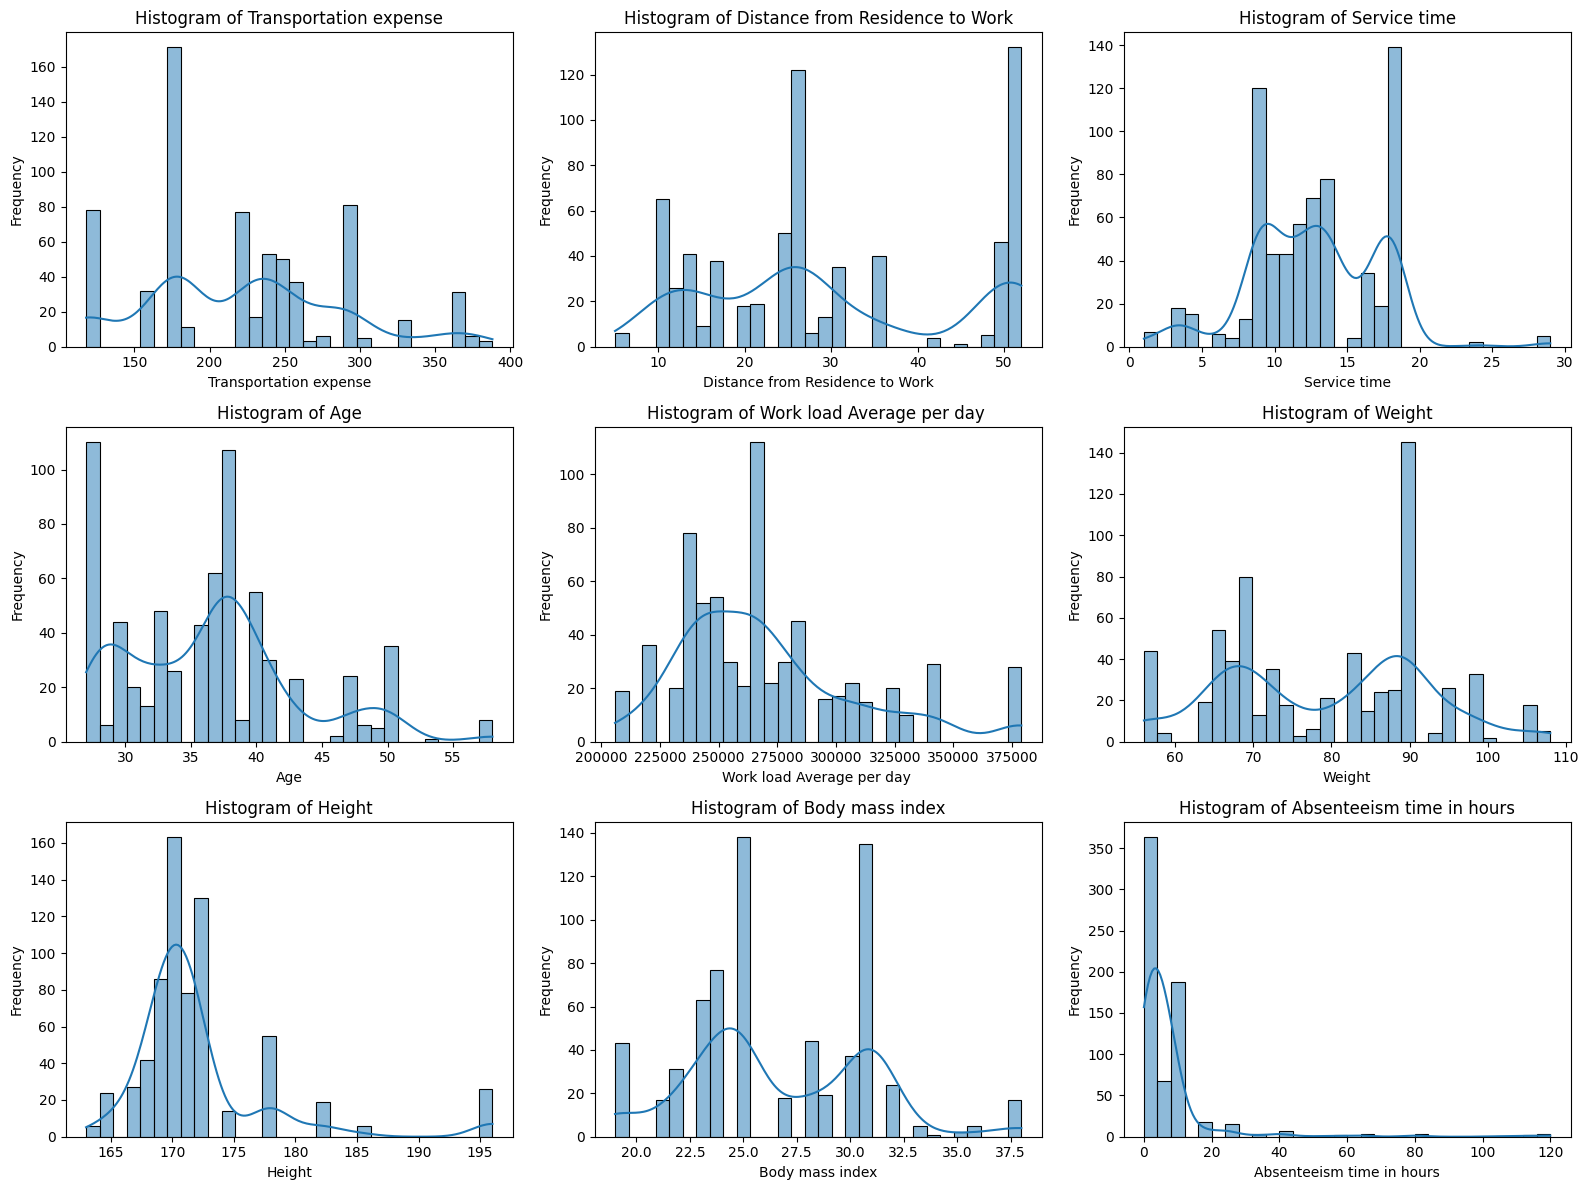

<ipython-input-52-a89caea5b43d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')
<ipython-input-52-a89caea5b43d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')
<ipython-input-52-a89caea5b43d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[feature], palette='viridis')
<ipython-input-52-a89caea5b43d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

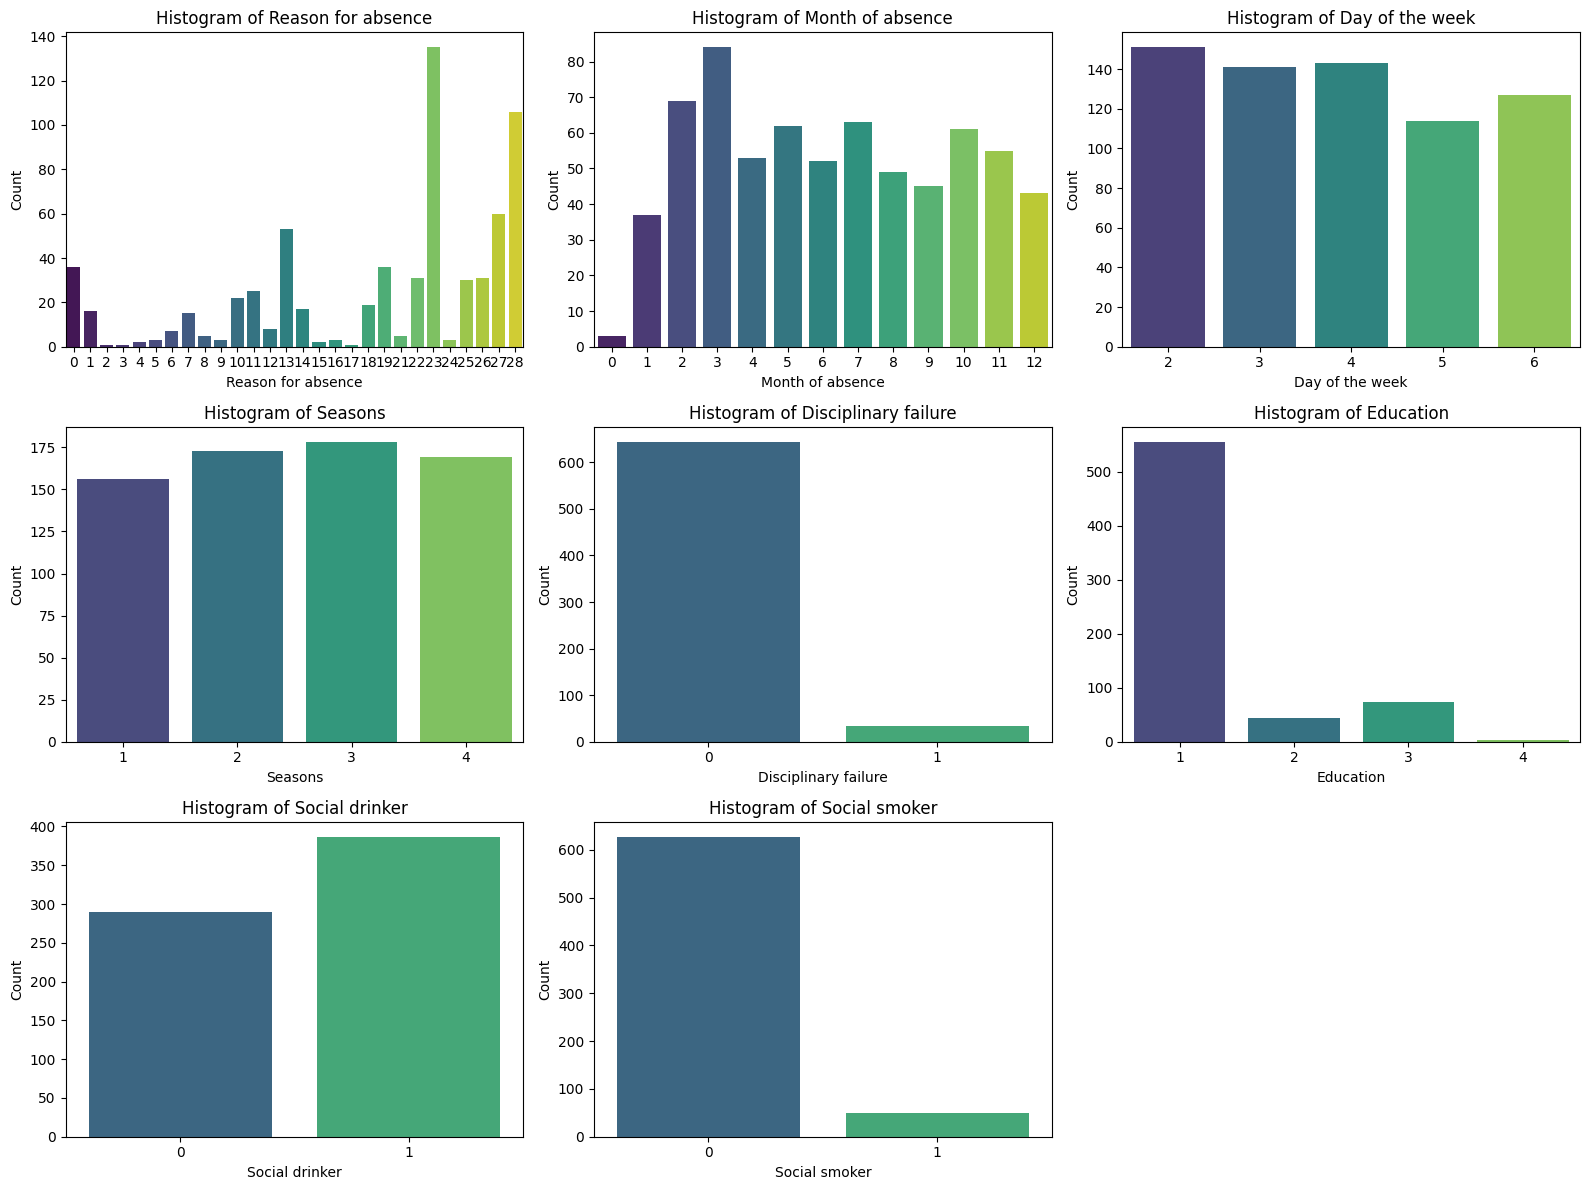

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_excel('Absenteeism_at_work_Project.xls')

# Replace missing values with the median and ensure they are integers
df.fillna(df.median(), inplace=True)
df = df.round()

# Plot histograms for numerical variables
numerical_features = ['Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age',
                      'Work load Average per day ', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot histograms for categorical variables
categorical_features = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
                        'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[feature], palette='viridis')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()
